# Project: Data Analysis of Mental Health Survey Data in Tech.
## by Daniel Leirer

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#set&lib">Settings and Libraries</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#multivar">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>

## Introduction

This is an exploratory analysis of Mental Health Survey Data in Tech. The data used here is available at  https://osmihelp.org/research.

Raw data files were converted to CSV prior to use. 

<a id="set&lib"></a>
    
## Settings & Libraries:


### Import Packages


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#magic for matplotlib
%matplotlib inline

#make data folder
data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

### Get Survey data
Read CSV data.

In [2]:
#Paths to files
MHS_2014_Path = os.path.join(data_dir,"MHS_2014.csv")
MHS_2016_Path = os.path.join(data_dir,"MHS_2016.csv")
MHS_2017_Path = os.path.join(data_dir,"MHS_2017.csv")
MHS_2018_Path = os.path.join(data_dir,"MHS_2018.csv")
MHS_2019_Path = os.path.join(data_dir,"MHS_2019.csv")


#Load Data
df_mhs2014 = pd.read_csv(MHS_2014_Path, sep=",")
df_mhs2016 = pd.read_csv(MHS_2016_Path, sep=",")
df_mhs2017 = pd.read_csv(MHS_2017_Path, sep=",")
df_mhs2018 = pd.read_csv(MHS_2018_Path, sep=",")
df_mhs2019 = pd.read_csv(MHS_2019_Path, sep=",")



<a id="clean"></a>
## Clean Data

### Clean Columns
Column names are the questions, which is not ideal. 
First step is to create new column names, and to create a dataframe that maps the column names to the questions. 

1. Some column names contain unwanted characters. Remove 
2. Code new column names.
3. Create dataframe for mapping. 
4. Combine Data. 

In [3]:
#function to clean columns
def clean_cols(input_df):
    '''
    Function to remove 
    Input = 
    Dataframe of survey data.
    Output = 
    columns that are cleaned by removing symbols like (* <)
    '''
    
    list_to_replace = ["<strong>","</strong>","\*"]
    for i in list_to_replace:
        input_df.columns=input_df.columns.str.replace(i,"")
        
    return (input_df)

#clean columns
df_mhs2014=clean_cols(df_mhs2014)
df_mhs2016=clean_cols(df_mhs2016)
df_mhs2017=clean_cols(df_mhs2017)
df_mhs2018=clean_cols(df_mhs2018)
df_mhs2019=clean_cols(df_mhs2019)


In [4]:
## 2014 data columns
columns_2014 = ['Timestamp', 'Age', 'Gender', 'Country',
       'US_state',
       'Selfemployed',
       'MH_Family_History',
       'MH_treatment_professional',
       'MH_work_interfere',
       'Company_size',
       'Company_remote_work_50_perc',
       'Company_tech',
       'Company_MH_benefits',
       'Company_MH_care_known',
       'Company_MH_wellness',
       'Company_MH_resources_provided',
       'Company_MH_program_anonymised',
       'Company_MH_medical_leave_ease',
       'Company_MH_discuss_neg',
       'Company_PH_discuss_neg',
       'MH_discuss_willing_Coworker',
       'MH_discuss_willing_supervisor',
       'Job_interview_MH',
       'Job_interview_PH',
       'Company_serious_MH_vs_PH',
       'MH_Neg_outcome_coworker',
       'Comments']


## 2016 data columns
columns_2016 = ['Selfemployed',
       'Company_size',
       'Company_tech',
       'Company_role_tech',
       'Company_MH_benefits',
       'Company_MH_benefits_aware',
       'Company_MH_benefits_discussed',
       'Company_MH_resources',
       'Company_MH_resources_anonymous',
       'Company_MH_medical_leave_ease',
       'Company_MH_discuss_neg',
       'Company_PH_discuss_neg',
       'MH_discuss_willing_Coworker',
       'MH_discuss_willing_Supervisor',
       'Company_serious_MH_vs_PH',
       'MH_Neg_outcome_coworker',
       'MH_Neg_career',
       'MH_Coworker_view',
       'MH_willing_share_friends',
       'MH_badly_handled',
       'MH_Family_History',
       'MH_past',
       'MH_current',
       'MH_diagnosed',
       'MH_believed_to_have',
       'MH_diagnosed_professional',
       'MH_diagnosed_conditions_professional',
       'MH_treatment_professional',
       'MH_work_intereference_treated',
       'MH_work_intereference_untreated',
       'Age', 'Gender',
       'Country',
       'US_state',
       'Country_work',
       'US_state_work',
       'Work_position',
       'Remote']


## 2019 data columns
columns_2019 = ['Selfemployed',
       'Company_size',
       'Company_tech',
       'Company_role_tech',
       'Company_MH_benefits',
       'Company_MH_benefits_aware',
       'Company_MH_benefits_discussed',
       'Company_MH_resources',
       'Company_MH_resources_anonymous',
       'Company_MH_medical_leave_ease',
       'Coworker_comfort_MH_vs_PH',
       'MH_discuss_supervisor',
       'MH_discuss_Company_ever',
       'MH_discuss_coworker_comfort',
       'MH_discuss_coworker',
       'Conversation_coworkers_describe',
       "Coworker_MH_Discussed",
       'Company_PH_importance',
       'Company_MH_importance',
       'MH_current',
       'MH_diagnosed_ever',
       'MH_diagnoses',
       'MH_believed_to_have',
       'MH_diagnosed_conditions_professional',
       'MH_past',
       'MH_treatment_professional',
       'MH_Family_History',
       'MH_work_intereference_treated',
       'MH_work_intereference_untreated',
       'MH_treatment_others_effect',
       'MH_willing_share_friends',
       'Job_interview_PH',
       'Job_interview_Why_why_not',
       'Job_interview_MH',
       'Work_open_about_own_MH',
       'Work_team_reaction_to_MH',
       'Tech_industry_support_impression',
       'Age', 'Gender',
       'Country',
       'US_state',
       'Race', 'Country_work',
       'US_state_work']

Mental_health_old_cats = ["Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)","Attention Deficit Hyperactivity Disorder","Personality Disorder (Borderline, Antisocial, Paranoid, etc)","Obsessive-Compulsive Disorder","Post-traumatic Stress Disorder","Stress Response Syndromes","Dissociative Disorder","Substance Use Disorder","Addictive Disorder","Other"]
Mental_health_new_cats = ["Anxiety","Mood","Psychotic","Eating","ADHD","Personality","OCD","PTSD","Stress_response","Dissociative","Substance_use","Addictive","Other"]

In [5]:
#make dataframes for original column names
df_mhs2014_questions = pd.DataFrame( {"Column_id" : columns_2014 , "Question" : df_mhs2014.columns.values , "Year" : "2014" }) 
df_mhs2016_questions = pd.DataFrame( {"Column_id" : columns_2016 , "Question" : df_mhs2016.columns.values , "Year" : "2016" }) 
df_mhs2019_questions = pd.DataFrame( {"Column_id" : columns_2019 , "Question" : df_mhs2019.columns.values , "Year" : "2019" }) 
df_mh_categories = pd.DataFrame( {"Column_id" : Mental_health_new_cats, "Question" : Mental_health_old_cats , "Year" : "2018" })

#dataframe that stores all column to question translations. 
df_column_questions_full= pd.concat([df_mhs2014_questions,df_mhs2016_questions,df_mhs2019_questions,df_mh_categories])


df_column_questions_full







,Column_id,Question,Year
0,Timestamp,Timestamp,2014
1,Age,Age,2014
2,Gender,Gender,2014
3,Country,Country,2014
4,US_state,"If you live in the United States, which state ...",2014
...,...,...,...
8,Stress_response,Stress Response Syndromes,2018
9,Dissociative,Dissociative Disorder,2018
10,Substance_use,Substance Use Disorder,2018
11,Addictive,Addictive Disorder,2018


In [6]:
#select columns for 2018 and 2017 survey that appear in other surveys and replace column name. 
def map_col_to_id(input_df, col_dictionary = df_column_questions_full):
    '''
    Replace column names from survey question to column_id based on existing dictionary.  
    Input:
    input_df = Dataframe of survey data for 2018 or 2019
    col_dictionary = dictionary matching questions to columns. 
    Output:
    Dataframe with new column names. 
    '''
    #Subset dictionary to single instance of question. 
    col_dictionary = col_dictionary.drop_duplicates(subset="Question")
    #check what questions overlap with input_df
    col_dictionary = col_dictionary[col_dictionary.Question.isin(input_df.columns)]
    #subset input_df columns to ones in col_dictionary and sort to match that order.
    input_df=input_df[col_dictionary.Question]
    #replace columns in input df with column_id from dictionary.
    input_df.columns = col_dictionary.Column_id
    return (input_df)

#Function to set index and User_ID
def make_user_index(input_df,survey_year):
    '''
    Function to make unique user Ids and index.
    Input = 
    Dataframe of survey data
    Year of survey
    Output = 
    Dataframe with year column and index added. 
    '''
    #add column for year of survey
    input_df["Year"] = survey_year
    #Add userid column
    input_df["User_ID"] = range(len(input_df))
    #Expand userid to make it a better identifer
    input_df["User_ID"] = "User_"+input_df.User_ID.astype(str) +"_"+input_df.Year.astype(str)
    #setIndex
    input_df.set_index(input_df["User_ID"],inplace=True)
    return (input_df)

In [7]:
#Add Columns for mental health disorders. 

Mental_health_old_cats = ["Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)","Attention Deficit Hyperactivity Disorder","Personality Disorder (Borderline, Antisocial, Paranoid, etc)","Obsessive-Compulsive Disorder","Post-traumatic Stress Disorder","Stress Response Syndromes","Dissociative Disorder","Substance Use Disorder","Addictive Disorder","Other"]
Mental_health_new_cats = ["Anxiety","Mood","Psychotic","Eating","ADHD","Personality","OCD","PTSD","Stress_response","Dissociative","Substance_use","Addictive","Other"]


In [8]:
#Change column names to be more readable
df_mhs2014 = map_col_to_id(df_mhs2014)
df_mhs2016 = map_col_to_id(df_mhs2016)
df_mhs2017 = map_col_to_id(df_mhs2017)
df_mhs2018 = map_col_to_id(df_mhs2018)
df_mhs2019 = map_col_to_id(df_mhs2019)


#Add_User_id
df_mhs2014 = make_user_index(df_mhs2014,2014)
df_mhs2016 = make_user_index(df_mhs2016,2016)
df_mhs2017 = make_user_index(df_mhs2017,2017)
df_mhs2018 = make_user_index(df_mhs2018,2018)
df_mhs2019 = make_user_index(df_mhs2019,2019)

### Get Core Features and Clean

In [9]:
#combine data
df_mhs_core=pd.concat([df_mhs2014,df_mhs2016,df_mhs2017,df_mhs2018,df_mhs2019],sort=True)


In [10]:
## Mental Health Categories clean. 

#loop through mental health categories, and add to columns if found. 
for i in range(len(Mental_health_old_cats)):
    #find mental health conditions in diagnosed conditions professional column. 
    mh_cat_finder=df_mhs_core.MH_diagnosed_conditions_professional.str.contains(Mental_health_old_cats[i],regex=False)
    #subset to rows where old category was found, and the new column where it should be. Write Yes.
    df_mhs_core.loc[mh_cat_finder == True,Mental_health_new_cats[i]] = "Yes"

#for loop to replace values other than "yes" with yes. This is for surveys from 2017 and 2018 where the actual disease description is in each column.
for i in range(len(Mental_health_old_cats)):
    df_mhs_core.loc[(df_mhs_core[Mental_health_new_cats[i]] != "Yes") & (df_mhs_core[Mental_health_new_cats[i]].isna() == False),Mental_health_new_cats[i]] = "Yes"


In [11]:
# Count number of condition to get comorbidity
df_mhs_core["comorbidity"] = df_mhs_core[Mental_health_new_cats].isin(["Yes"]).sum(axis=1)

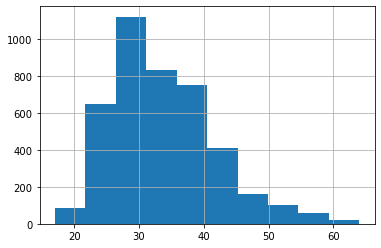

In [12]:
## Clean Age

#set ages below 0 and above 70 to Nan
df_mhs_core.Age.where((df_mhs_core.Age > 16) & (df_mhs_core.Age < 65), np.NaN, inplace = True)

df_mhs_core.Age.hist()

In [13]:
## Clean Gender
male_var = ['M', 'male',  'm', 'Male-ish', 'maile','something kinda male?','Cis Male','Mal', 'Male (CIS)','Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man','msle','Cis Man','Mail', 'cis male',
       'Malr','ostensibly male, unsure what that really means','man','Cis male', 'Male.', 
         'Male (cis)','Sex is male',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|','Dude','cis man',   'Masculine', 'Cishet male','male ','cisdude','Let\'s keep it simple and say "male"', 'MALE','Identify as male',       'I have a penis', 'masculino', 
        'CIS Male', "male (hey this is the tech industry you're talking about)", 'male, born with xy chromosoms','male/androgynous ','Male',
 'cis male ','cis-male', 'cis hetero male', 'Male, cis','Malel',  'dude','Cis-male','Cisgender male','Ostensibly Male']
female_var = ['Cis Female','female', 'F','Woman', 'f','Female ','cis-female/femme','Female (cis)',  'femail', 'Femake', 'woman',
       'I identify as female.', 'female ','Female assigned at birth ',  'fm', 'Cis female ','Female or Multi-Gender Femme','female/woman','Female (props for making this a freeform field, though)',
       ' Female','Cisgender Female','fem', 'Cis-woman', 'female-bodied; no feelings about gender','Femile','Female-identified','cis woman', 
       'femmina', 'female (cis)','female (cisgender)','femalw','cisgender female','cis female','cis-Female','Woman-identified', 'I identify as female',
  'My sex is female.', 'Cis woman','Cis-Female','F, cisgender','Cisgendered woman','Female','Female (cis) ','Female (cisgender)','Female-ish']
trans_var = ['Transgender woman','Trans-female','Trans woman','Female (trans)','Transitioned, M2F','Other/Transfeminine','Agender trans woman','mtf','Trans female', 'trans woman','transgender','Female_trans','Trans man','Male (trans, FtM)','Male_trans','Trans non-binary/genderfluid']
queer_variations = ['queer/she/they','non-binary','fluid', 'Genderqueer', 'Androgyne', 'Agender','Neuter','queer','Bigender','male 9:1 female, roughly','Genderfluid (born female)','Male/genderqueer','Androgynous','Other',
       'nb masculine','genderqueer','Genderfluid','genderqueer woman',  'Queer','Genderflux demi-girl', 'agender', 'Questioning','Non-binary', 'Fluid','Nonbinary',   'Non binary','Non-binary and gender fluid','None', 'non binary','nonbinary','none','sometimes','uhhhhhhhhh fem genderqueer?', 'gender non-conforming woman','genderfluid', 'Transfeminine','Male (or female, or both)', 'Nonbinary/femme', 'Genderqueer/non-binary', 'Genderqueer demigirl', 'Contextual', 'Demiguy', 'NB', 'None', 'Queer','*shrug emoji* (F)',
 'Agender/genderfluid','Female/gender non-binary.','SWM','She/her/they/them',"None"]
NA_var = ['Nah', 'All','Enby', 'A little about you','p','Unicorn','I am a Wookie','none of your business',  'Human','human','rr', '43', 'AFAB','God King of the Valajar','\\-']


#list of gender variations
gender_var_list = [male_var,female_var,trans_var,queer_variations,NA_var]
        
#List of new categories
new_gender_cats = ["Male","Female","Trans","Queer","None"]

#loop to replace gender variables
for g in range(len(new_gender_cats)):
        df_mhs_core.Gender.replace(gender_var_list[g],new_gender_cats[g],inplace=True)
        
#check gender categories
df_mhs_core.Gender.value_counts()


Male      3055
Female    1031
Queer       75
Trans       17
None        16
Name: Gender, dtype: int64

In [14]:
#Clean Country
df_mhs_core.Country.replace(['United States','United States of America'],"USA",inplace=True)

#Clean company size
df_mhs_core.Company_size.replace(["25-Jun","5-Jan","More than 1000"],["6-25","1-5","1000+"],inplace=True)
df_mhs_core.Company_size=df_mhs_core.Company_size.astype('category').cat.set_categories(["1-5", "6-25", "26-100", "100-500", "500-1000", "1000+"], ordered=True)

#Clean Mental Health Treatment.
df_mhs_core.MH_treatment_professional.replace([1,0],["Yes","No"],inplace=True)

#Clean Selfemployed
df_mhs_core.Selfemployed.replace([1,0],["Yes","No"],inplace=True)

#Clean Company Benefits
df_mhs_core.Company_MH_benefits.replace(['Not eligible for coverage / N/A','Not eligible for coverage / NA'],np.nan,inplace=True)
df_mhs_core.Company_MH_benefits.replace(["Don't know", "I don't know"],"Unknown",inplace=True)


<a id="analysis"></a>

## Analysis:
Questions. How old are men and women. 

In [15]:
##### Plotting functions ########
#function to calculate proportions for plotting. 
def proportion_calc(input_df,group_vars,outcome_var):
    ''' 
    Function to calculate Proportion of outcome variable in groups. 
    
    Input: 
        input_df - this is the input datafame that contains all group variables and outcome variable.
        group_vars - Variables to groupby
        outcome_var - the variable of interest. 
    Output: 
        output_df - this is a dataframe with the proportions of outcome_var in a column. 
    '''
    
    output_df=input_df.groupby(by=group_vars)[outcome_var].value_counts(normalize=True).rename("Proportion").reset_index()
    return output_df
 
#Function to plot categorical plot.
def plot_prop(input_df,x_var, x_label, hue):
    '''
    Function to plot data from proportion_calc
    
    Input:
        input_df - dataframe with proportion column. From proportion_calc
        x_var - x axis variable (categorical)
        x_label - x axis label
        hue - hue. see Seaborn documentation.
    Output:
        Outputs categorical plot
    '''
    base_color = sns.color_palette()[0]
    g = sns.catplot(data=temp_df, x=x_var, y="Proportion", hue=hue, kind='bar',legend=False,color = base_color)
    g.add_legend()
    (g.set_axis_labels(x_label)
       .despine(left=True))


### There is a relationship between company size and providing mental health benefits. 
This makes sense, small startups don't have the resources for mental health packages. 

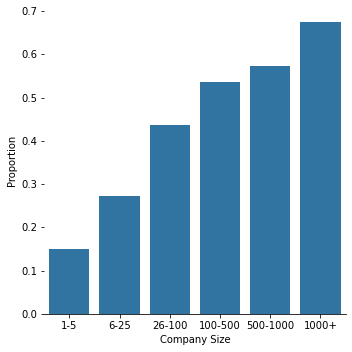

In [17]:
#Get Proportions for Company Size and Mental Health Benefits. 
prop_benefits=proportion_calc(df_mhs_core,"Company_size","Company_MH_benefits")
prop_benefits.Company_size=prop_benefits.Company_size.astype('category').cat.set_categories(["1-5", "6-25", "26-100", "100-500", "500-1000", "1000+"], ordered=True)
prop_benefits.Company_MH_benefits=prop_benefits.Company_MH_benefits.astype('category').cat.set_categories(["Yes","No","Unknown"], ordered=True)
prop_benefits=prop_benefits.loc[prop_benefits["Company_MH_benefits"] == "Yes",]

#Plot
base_color = sns.color_palette()[0]
g = sns.catplot(data=prop_benefits, x="Company_size", y="Proportion", kind='bar',legend=False,color = base_color)
(g.set_axis_labels("Company Size")
       .despine(left=True))


### For people with mental health problems that often interefere with their work when untreated, 90% see improvement with proper treatment. 

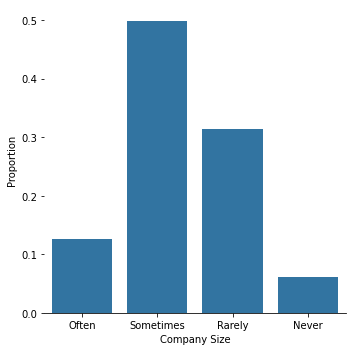

In [18]:
#remove indivduals who are have not found applicable treatment
df_mhs_treated=df_mhs_core.loc[df_mhs_core["MH_work_intereference_treated"] != "Not applicable to me",]

prop_benefits=proportion_calc(df_mhs_treated,"MH_work_intereference_untreated","MH_work_intereference_treated")

prop_benefits=prop_benefits.loc[prop_benefits["MH_work_intereference_untreated"] == "Often",]

prop_benefits.MH_work_intereference_treated=prop_benefits.MH_work_intereference_treated.astype('category').cat.set_categories(["Often","Sometimes","Rarely","Never"], ordered=True)

#Plot
g = sns.catplot(data=prop_benefits, x="MH_work_intereference_treated", y="Proportion", kind='bar',legend=False,color = base_color)
(g.set_axis_labels("Company Size")
       .despine(left=True))

### 1: Mental Illness, describe. How many conditions, comorbidty. 


Looking at the data it appears that Mood & Anxiety disorders are the most common, followed by ADHD and PTSD. 


,index,Number
0,Mood,907
1,Anxiety,731
2,ADHD,250
3,PTSD,164
4,OCD,92
5,Stress_response,62
6,Personality,56
7,Eating,54
8,Substance_use,50
9,Addictive,33


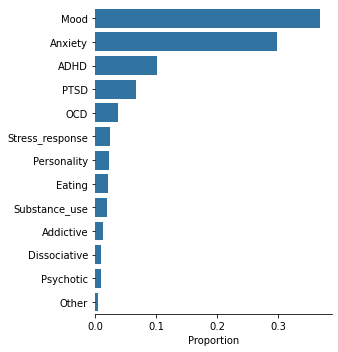

In [19]:
### What disorders are most frequent? 

df_mental_health=pd.melt(df_mhs_core,id_vars=["User_ID","comorbidity"],value_vars=Mental_health_new_cats)


df_n_mh_cats=df_mental_health.dropna().variable.value_counts(normalize=True).rename("Proportion").reset_index()
#Plot
g = sns.catplot(data=df_n_mh_cats, x="Proportion", y="index", kind='bar',legend=False,color = base_color)
(g.set_axis_labels("Proportion","")
       .despine(left=True))

df_num_cats=df_mental_health.dropna().variable.value_counts(normalize=False).rename("Number").reset_index()
df_num_cats




### 2: Productivity.
How are people affected at work. What conditions are worst?


ADHD, Anxietry and PTSD are most affected. 

In [45]:
#define variables that are important to keep for this exploration.
productivity_vars=["User_ID","comorbidity","MH_work_intereference_untreated","MH_work_intereference_treated"]
#melt data 
df_mental_health=pd.melt(df_mhs_core,id_vars=productivity_vars,value_vars=Mental_health_new_cats,var_name='Condition')
#subset to indiviuals with 4 or less comorbid conditions. 
df_mental_health=df_mental_health[df_mental_health.comorbidity <= 4]
#remove individuals who awnsered "not applicable to me" to either intereference question. 
df_mental_health=df_mental_health[(df_mental_health.MH_work_intereference_treated != "Not applicable to me") & (df_mental_health.MH_work_intereference_untreated != "Not applicable to me")]
#dropnas 
df_mental_health.dropna(inplace=True)

#Check most common condtions. 
df_mental_health["Condition"].value_counts()
common_conditions=["Mood","Anxiety","ADHD","PTSD","OCD"]

df_mental_health=df_mental_health[df_mental_health["Condition"].isin(common_conditions)]

df_mh_untreated=df_mental_health.groupby(["Condition"])["MH_work_intereference_untreated"].value_counts(normalize=True).rename("Proportion").reset_index()
df_mh_untreated




,Condition,MH_work_intereference_untreated,Proportion
0,ADHD,Often,0.789474
1,ADHD,Sometimes,0.184211
2,ADHD,Rarely,0.019737
3,ADHD,Never,0.006579
4,Anxiety,Often,0.699074
5,Anxiety,Sometimes,0.263889
6,Anxiety,Rarely,0.032407
7,Anxiety,Never,0.004630
8,Mood,Often,0.687500
9,Mood,Sometimes,0.279514


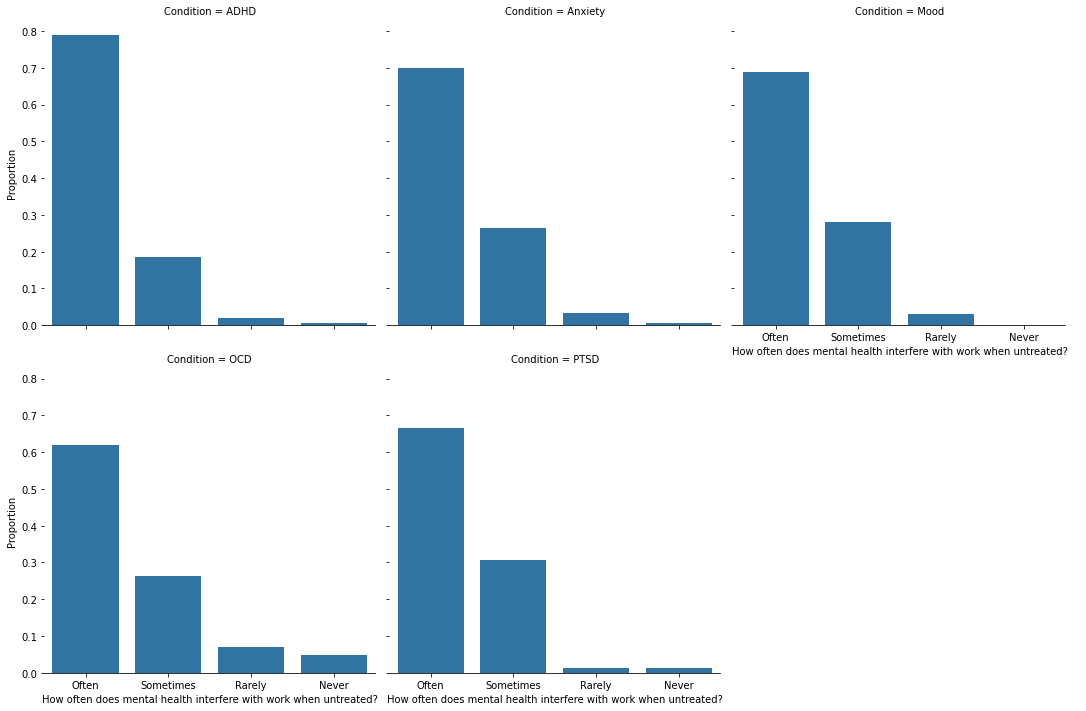

In [46]:
cat_order= ['Often', 'Sometimes','Rarely','Never']

g = sns.catplot(data=df_mh_untreated, x="MH_work_intereference_untreated", y="Proportion",
                col="Condition", kind='bar',order=cat_order,col_wrap=3,
                sharex=True,sharey=True,color = base_color,legend=False)
g.add_legend()
#g.plt.xlabel("Sense of Belonging - Feel Like Outsider")
(g.set_axis_labels("How often does mental health interfere with work when untreated?")
   .despine(left=True))  

It looks like ADHD has the largest proportion of individuals who are often affected. 
To look at this more closely I am going to recode the survey results as numbers and calculate the decrease in how individuals were affected. 

In [51]:
#define variables that are important to keep for this exploration.
productivity_vars=["User_ID","comorbidity","MH_work_intereference_untreated","MH_work_intereference_treated"]
#melt data 
df_mental_health=pd.melt(df_mhs_core,id_vars=productivity_vars,value_vars=Mental_health_new_cats,var_name='Condition')
#subset to indiviuals with 4 or less comorbid conditions. 
df_mental_health=df_mental_health[df_mental_health.comorbidity <= 1]
#remove individuals who awnsered "not applicable to me" to either intereference question. 
df_mental_health=df_mental_health[(df_mental_health.MH_work_intereference_treated != "Not applicable to me") & (df_mental_health.MH_work_intereference_untreated != "Not applicable to me")]
#dropnas 
df_mental_health.dropna(inplace=True)

#Check most common condtions. 
df_mental_health["Condition"].value_counts()
common_conditions=["Mood","Anxiety","ADHD","PTSD","OCD"]

df_mental_health=df_mental_health[df_mental_health["Condition"].isin(common_conditions)]


df_mental_health.Condition.value_counts()

Mood       196
Anxiety     77
ADHD        32
PTSD         9
OCD          3
Name: Condition, dtype: int64

### When treated ADHD sees the highest improvement according to self reports. 

In [48]:
#change to categorical
df_mental_health["MH_work_intereference_untreated"]= df_mental_health["MH_work_intereference_untreated"].astype('category').cat.set_categories(["Never", "Rarely", "Sometimes", "Often"], ordered=True)
df_mental_health["MH_work_intereference_treated"]= df_mental_health["MH_work_intereference_treated"].astype('category').cat.set_categories(["Never", "Rarely", "Sometimes", "Often"], ordered=True)#make factor

#Create factors
df_mental_health["MH_untreated_factor"] , empty = df_mental_health["MH_work_intereference_untreated"].factorize(sort=True)
df_mental_health["MH_treated_factor"] , empty = df_mental_health["MH_work_intereference_treated"].factorize(sort=True)

df_mental_health["Change_when_treated"] = df_mental_health.MH_untreated_factor - df_mental_health.MH_treated_factor 


df_mental_health.groupby("Condition").MH_treated_factor.mean()



Condition
ADHD       1.687500
Anxiety    1.337662
Mood       1.352041
OCD        1.666667
PTSD       1.111111
Name: MH_treated_factor, dtype: float64